# Сборный проект

# Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файла

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# чтение файла с данными и сохранение в df с использованием конструкции try-except
try:
    df = pd.read_csv('C:/Users/datasets/games.csv')  # локальный путь
except:
    df = pd.read_csv('/datasets/games.csv')  # серверный путь

In [3]:
# получение 5 строк таблицы df
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8515,Dancing With The Stars,PS2,2007.0,Misc,0.08,0.06,0.00,0.02,NaN,tbd,E10+
11027,Pro Evolution Soccer 2012,PC,2011.0,Action,0.00,0.07,0.00,0.02,77.0,6.4,NaN
5329,EverGrace,PS2,2000.0,Role-Playing,0.10,0.08,0.15,0.03,59.0,7.8,T
6385,Just Dance Kids 2,Wii,2011.0,Misc,0.25,0.00,0.00,0.02,NaN,tbd,E
13532,Sekai no Gohan Shaberu! DS Oryouri Navi,DS,2008.0,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN


In [4]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# получение статистической информации
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод**

Таблица состоит из 11 столбцов, 6 столбцов из которой имеют вещественный тип данных, а остальные строковый. В каждой строке таблицы - данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

## Предобработка данных

Заменим названия всех столбцов: приведем к нижнему регистру.

In [6]:
# замена названий столбцов
df.columns = df.columns.str.lower()

In [7]:
# проверка
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь заменим тип данных на целочисленный в  столбце с годом выпуска игры, а столбец `user_score` сделаем числовым. Кроме того в этом столбце есть аббревиатура 'tbd', которая означает to be determined, т.е можно данную аббревиатуру воспринимать как пропуск. Поэтому при замене типа данных данные значения станут `nan`.

In [8]:
# замена типа данных float64 на Int64
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score']= pd.to_numeric(df['user_score'], errors='coerce')
df.dtypes # проверка

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Теперь перейдем к обработке пропусков в данных. В столбце с названием игры имеются два пропуска, не смотря на то, что по этим играм есть информация о годе выпуске, платформе и продажах, узнать название мы не сможем, а без него информация не имеет смысла. Так как пропуска всего два, то можно удалить данные строки, что не повлияет на результаты исследования.

In [9]:
# просмотр строк с пропусками в столбце name
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# удаление строк с пропусками в столбце name
df.drop(labels=[659, 14244], axis=0, inplace = True)

In [11]:
# проверка
df['name'].isna().sum()

0

У нас имеется 269 пропусков в столбце `year_of_release`, заполним их вручную, посмотрев год выпуска игр в интернете.

In [12]:
# просмотр пропущенных значений в столбце year_of_release
df.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# заполнение пропущенных значений
df['year_of_release'][183, 377, 2773, 3704, 4294, 6255, 7332, 12011, 14931, 15754, 16522] = 2004
df['year_of_release'][456, 678, 1538, 2361, 2536, 3289, 4373, 4445, 4945, 4959, 6293, 6356, 9485, 10764,
                      11016, 11433, 11565, 12568, 12734, 13142, 13781, 14141, 15292, 15704, 15953, 16373, 16458] = 2008
df['year_of_release'][475, 719, 2479, 3187, 4127, 4205, 5294, 6019, 6773, 6999, 8023, 8212, 9761, 9876,
                      10465, 10486, 12241, 12524, 12784, 13929, 14126, 14597, 15079, 15675] = 2006
df['year_of_release'][609, 4337, 4437, 5041, 6299, 7354, 8740] = 1978
df['year_of_release'][627, 805, 1142, 1840, 3352, 5070, 5932, 10050, 11455, 12959, 13317, 13874, 14350, 
                      15795, 15998, 16079, 16348] = 2007
df['year_of_release'][657, 2281, 4848, 8150, 8547, 9380] = 2001
df['year_of_release'][1131, 2169, 2849, 4635, 5443, 5624, 5874, 6818, 6861, 6899, 7108, 7584, 8250, 8500,
                      9043, 9218, 9827, 9855, 10993, 11550, 12718, 14252, 14449, 14685, 16080, 16180] = 2010
df['year_of_release'][1301, 13711] = 1998
df['year_of_release'][1506, 5800] = 1979
df['year_of_release'][1585, 2106, 6266] = 1977
df['year_of_release'][1609, 2132, 2273, 2453, 2522, 2969, 3081, 3233, 4648, 4818, 5326, 6476, 6636, 7210, 
                      7387, 7391, 7406, 7735, 7848, 8151, 8680, 10317, 10686, 10790, 11377, 11622, 11943,
                      11957, 12235, 12896, 13060, 13195, 13609, 13647, 14105, 14746, 15022, 15081, 16059, 16293] = 2011
df['year_of_release'][1650, 3739, 4775, 5156, 5889, 8884, 9516, 10258, 12046, 13792, 14769, 15006, 15966, 16157, 16405] = 2003
df['year_of_release'][1699, 2108, 2492, 3223, 3459, 3486, 5194, 5588, 5769, 6101, 6199, 6954, 7008, 7367,
                      8197, 8319, 9817, 9830, 12217, 14749] = 2002
df['year_of_release'][1984, 5492, 13289, 13564] = 1999
df['year_of_release'][2010, 2157, 7605] = 1997
df['year_of_release'][2572, 3997, 8067, 8260, 8632, 9119, 9664, 9703, 10612, 11338, 11790, 12209, 14369, 
                      15119, 15267, 15535, 15557, 16017, 16288] = 2009
df['year_of_release'][3024, 3413, 5655, 6133, 6180, 6342, 6624, 8918, 9293, 10837, 11000, 12584, 12970, 14546, 15816] = 2005
df['year_of_release'][3883, 4220, 5642] = 1980
df['year_of_release'][4132] = 1982
df['year_of_release'][5336, 7724, 11954] = 2013
df['year_of_release'][5857, 9151, 11092, 11832] = 2000
df['year_of_release'][7353, 8364] = 1989
df['year_of_release'][9706, 9738, 11925, 12221, 12880, 14325, 14950, 15338, 16329, 16448] = 2012
df['year_of_release'][11119] = 1996
df['year_of_release'][12003] = 1993
df['year_of_release'][13672] = 2016
df['year_of_release'][14210] = 1984
df['year_of_release'][16277] = 2015

In [14]:
# проверка
df['year_of_release'].isna().sum()

0

Заполним еще немного пропусков средним значением в столбцах `critic_score` и `user_score`, но только для тех игр, которые размещены на нескольких платформах и на других имеют рейтинг. 

Говоря о причинах, скорее всего пропуски появились в результате некорректной выгрузки данных или же сбой при сборе информации. Заменять все пропуски мы не стали, так как данные могут исказиться.  Однако на это стоит обратить внимание и в дальнейшем не допускать появления такое числа пропусков.

In [15]:
# замена пропущенных значений в стролбце critic_score на среднее значение
df['critic_score'] = df.groupby('name')['critic_score'].transform(lambda x: x.fillna(x.mean()))

Сразу округлим значения в столбце `critic_score`.

In [16]:
# округление значений в столбце critic_score
df['critic_score'] = round(df['critic_score'])

In [17]:
# замена пропущенных значений в стролбце user_score на среднее значение
df['user_score'] = df.groupby('name')['user_score'].transform(lambda x: x.fillna(x.mean()))

В столбце с рейтингом пропуски заполним аббревиатурой NN, которая будет означать "неизвестно".

In [18]:
# заполнение пропусков в столбце rating
df['rating'] = df['rating'].fillna('NN')

In [19]:
# проверка
df['rating'].unique()

array(['E', 'NN', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Теперь посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [20]:
# рассчет суммарных продаж
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [21]:
# проверка
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NN,31.38


**Вывод**

Таким образом, в ходе предобработки данных были заменены названия столбцов, изменены типы данных, заполнены пропуски, а также подсчитаны суммарные продажи во всех регионах.

## Исследовательский анализ данных

Посмотрим с помощью сводной таблицы, сколько игр выпускалось в разные годы.

In [22]:
# подсчет количества выпущенных игр по годам
df.pivot_table(index=['year_of_release'], values='name', aggfunc='count')

,name
year_of_release,
1977,3
1978,7
1979,2
1980,12
1981,46
1982,37
1983,17
1984,14
1985,14


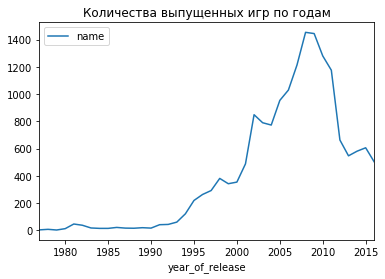

In [23]:
# график количества выпущенных игр по годам
df.pivot_table(index=['year_of_release'], values='name', aggfunc='count').plot(title='Количества выпущенных игр по годам');

Из таблицы видно, что с 1994 года количество игр резко стало расти. Резкий рост количества выпущенных игр приходится на 2002-2011 года, а пик на 2008 и 2009 год. После 2011 количество игр уменьшилось вдвое.

Чтобы посмотреть, как менялись продажи по платформам, создадим сводную таблицу, в которой выберем платформы с наибольшими суммарными продажами и построим по ним распределение по годам.

In [24]:
# подсчет суммарных продаж по платформам
df.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [25]:
# подсчет суммарных продаж для первых 9 платформ по годам
top_sales = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP']
top = df.query('platform==@top_sales').pivot_table(
    index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum').fillna(0) # в тех годах, где не было продаж, пропуски заполним 0
top

platform,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,
1985,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1989,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.00,0.00
1994,0.00,0.00,6.03,0.00,0.00,0.00,0.00,0.00,0.00
1995,0.00,0.00,35.96,0.00,0.00,0.00,0.00,0.00,0.00
1996,0.00,0.00,94.70,0.00,0.00,0.00,0.00,0.00,0.00
1997,0.00,0.00,136.17,0.95,0.00,0.00,0.00,0.00,0.00
1998,0.00,0.00,170.99,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.00,0.00,145.58,0.00,0.00,0.00,0.00,0.04,0.00
2000,0.00,0.07,96.76,39.17,0.00,0.00,0.00,0.00,0.00


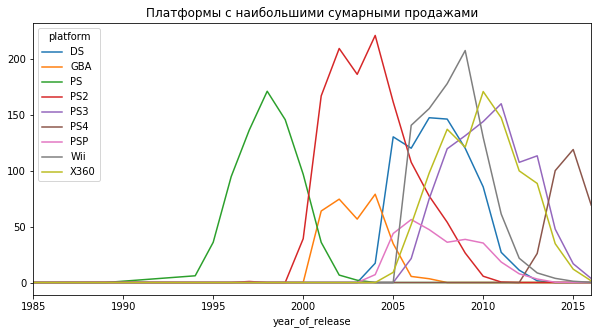

In [26]:
# распределение продаж по годам и платформам
top.plot(title='Платформы с наибольшими сумарными продажами', figsize=(10,5));
plt.show()

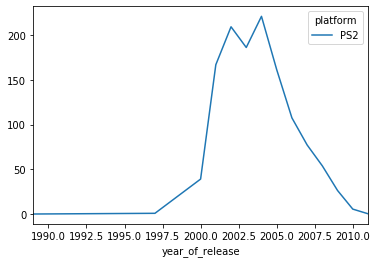

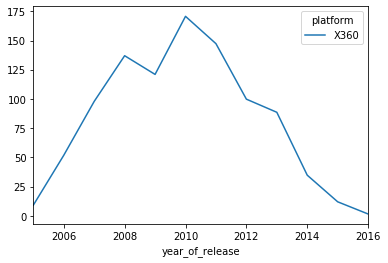

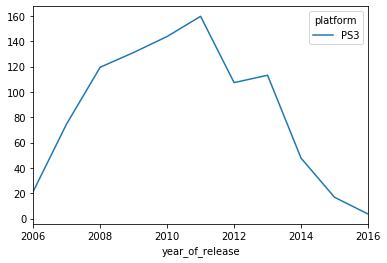

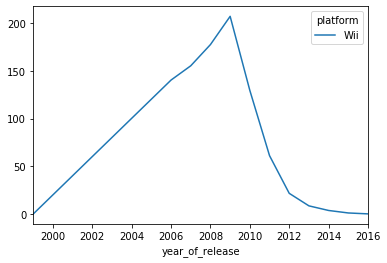

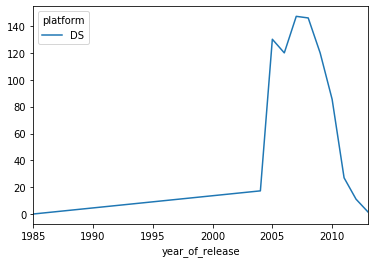

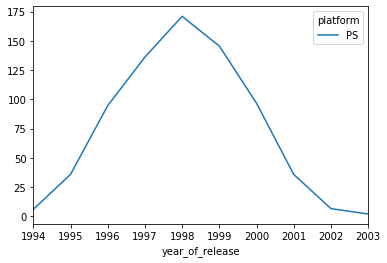

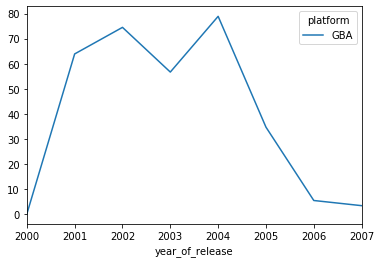

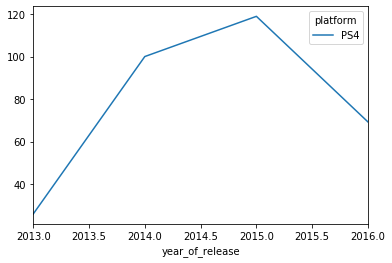

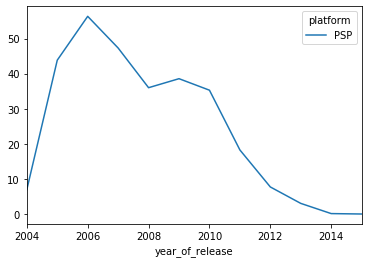

In [27]:
# распределение продаж для каждой платформы
for platform in top_sales:
    df.query('platform==@platform').pivot_table(
    index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum').fillna(0).plot();

На графике видно, что одни платформы сменяют другие, появляются новые. Например с 1994 по 2003 была платформа PS, затем были выпущеные новые версии консолей и на смену пришли PS2, затем PS3, а в 2013 появилась PS4. Актуальными платформы держаться лет 5-6 и за года 3-4 полностью теряют свою актуальность.

Для дальнейшего исследования оставим только данные за соответствующий актуальный период. Актуальным периодом будем считать 2014-2016 года.

In [28]:
# отбор данных за актуальный период
df_actual = df.query('year_of_release>=2014')
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NN,0.01


In [29]:
# продажи по платформам
df_platform = df_actual.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum')
df_platform

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Из таблицы видно, что лидирует по продажам платформа PS4, так же можно выделить XOne и 3DS. Платформы PSP и Wii имеют самые маленькие продажи, т.е можно сказать, что устарели.

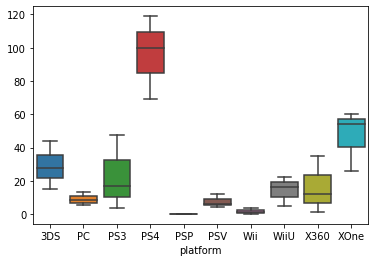

In [30]:
# "ящик с усами" по глобальным продажам игр в разбивке по платформам
sns.boxplot(data=df_platform);

Мы видим, что среди платформ выделяется платформа PS4. Количество проданных игр за три года в несколько раз превышает продажи на других платформах.

Далее посмотрим, как влияют на продажи внутри платформы отзывы пользователей и критиков на примере платформы PS3. Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [31]:
# срез данных по платформе PS3
df_PS3 = df_actual.query('platform=="PS3"')
df_PS3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NN,5.27
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,81.0,4.8,M,4.36
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,82.0,4.5,E,4.28
552,FIFA 16,PS3,2015,Sports,0.41,1.84,0.05,0.40,82.0,3.2,E,2.70
1021,Watch Dogs,PS3,2014,Action,0.56,0.81,0.10,0.27,74.0,5.1,M,1.74
...,...,...,...,...,...,...,...,...,...,...,...,...
16558,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,NN,0.01
16638,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,53.0,5.1,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NN,0.01


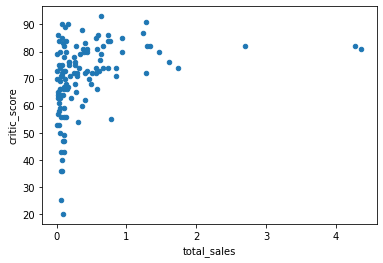

In [32]:
# диаграмма рассеивания по отзывам критиков
df_PS3.plot(x='total_sales', y='critic_score', kind='scatter');

In [33]:
# рассчет коэффициента корреляции между отзывами критиков и продажами
df_PS3['critic_score'].corr(df_PS3['total_sales'])

0.3183215658383992

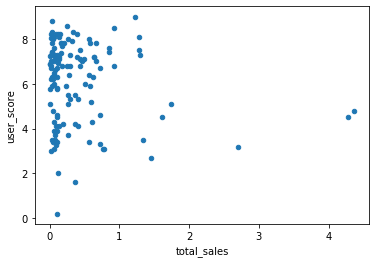

In [34]:
# диаграмма рассеивания по отзывам пользователей
df_PS3.plot(x='total_sales', y='user_score', kind='scatter');

In [35]:
# рассчет коэффициента корреляции между отзывами пользователей и продажами
df_PS3['user_score'].corr(df_PS3['total_sales'])

-0.14840710472933621

В целом можно сказать, что игры с более высокими оценками зарабатывают больше. Влияние отзовов критиков больше чем влияние отзывов пользователей. Корреляция между отзывами пользователей и продажами отрицательная. При этом зависимость между продажами и отзывами критиков и пользователей слабая.

Теперь посмотрим на общее распределение игр по жанрам. Сгруппируем данные по жанрам и построим столбчатую диаграмму. Использовать для рассчетов будем средние продажи.

In [36]:
# группировка средних продаж по жанрам
df_actual.groupby('genre')['total_sales'].mean()

genre
Action          0.322068
Adventure       0.094865
Fighting        0.470333
Misc            0.332301
Platform        0.476053
Puzzle          0.157857
Racing          0.398841
Role-Playing    0.459005
Shooter         1.335469
Simulation      0.298409
Sports          0.680000
Strategy        0.107027
Name: total_sales, dtype: float64

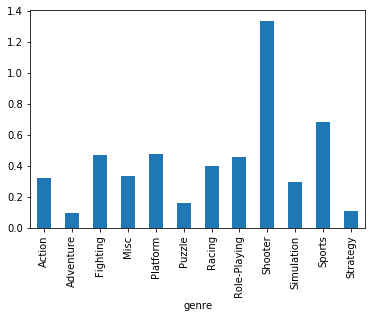

In [37]:
# столбчатая диаграмма 
df_actual.groupby('genre')['total_sales'].mean().plot(kind='bar');

Всего имеются 12 жанров игр. Самым популярным, а следовательно самым прибыльным является жанр "Shooter", далее идут "Sports", "Platform" и "Role-Playing". А наименее прибыльными оказались игры жанра "Adventure", "Strategy" и "Puzzle".

**Вывод**

Таким образом, с 1994 года количество игр резко стало расти. Резкий рост количества выпущенных игр приходится на 2002-2011 года, а пик на 2008 и 2009 год. Для дальнейшего исследования были оставлены данные за актуальные период 2014-2016 гг. В эти годы лидирует по продажам платформа PS4, так же можно выделить XOne и 3DS. Платформы PSP и Wii имеют самые маленькие продажи, т.е можно сказать, что устарели. Из рассмотренных жанров самым популярным, а следовательно самым прибыльным является жанр "Shooter", далее идут "Sports", "Platform" и "Role-Playing". А наименее прибыльными оказались игры жанра "Adventure", "Strategy" и "Puzzle".

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).

In [38]:
# группировка продаж для каждого региона по платформам
df_actual.groupby('platform').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})

,na_sales,eu_sales,jp_sales
platform,,,
3DS,22.64,16.12,44.24
PC,7.23,17.97,0.00
PS3,22.05,25.54,11.22
PS4,98.61,130.04,15.02
PSP,0.00,0.00,0.36
PSV,2.52,3.53,14.54
Wii,2.08,2.59,0.00
WiiU,19.36,13.15,7.31
X360,28.30,15.49,0.08


Для Северной Америки топ-5 платформ выглядит следующим образом: PS4, XOne, X360, 3DS и PS3. Для Европы распределение по платформам выглядет практически также кроме одной платформы: PS4, XOne, PS3, X360, PC, 3DS. В Японии топ платформ уже выглядет иначе: 3DS, PS4, PSV, PS3 и WiiU. То есть самая популярная платформа в Америке - это PS4 (34.7%) и XOne (28.6%), в Европе - PS4 (48%) и XOne (17%), а в Японии - 3DS (47.5%) и PS4 (15%).

Теперь для каждого региона определим топ-5 популярных жанров.

In [39]:
# группировка продаж для каждого региона по жанрам
df_actual.groupby('genre').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})

,na_sales,eu_sales,jp_sales
genre,,,
Action,72.53,74.68,29.58
Adventure,5.64,6.49,3.60
Fighting,12.43,6.69,6.37
Misc,15.05,12.86,5.61
Platform,6.79,6.80,2.69
Puzzle,0.65,0.52,0.93
Racing,8.74,14.13,1.76
Role-Playing,33.47,28.17,31.16
Shooter,79.02,65.52,4.87


Таким образом популярными жанрами для Северной Америки являются Shooter, Action, Sports, Role-Playing и Misc. Для Европы жанры совпадают за исключением гонок: Action, Shooter, Sports, Racing и Misc. А для Японии самым популярным жанром является Role-Playing и далее идут Action, Fighting, Misc, и Shooter.

Для определения влияния рейтинга ESRB на продажи в отдельном регионе сперва разберемся, что значит каждая буква рейтинга.
АО - «Только для взрослых», 
Е - «Для всех», 
Е10+ - «Для всех от 10 лет и старше», 
ЕС - «Для детей младшего возраста», 
М - «Для взрослых», 
RP - «Рейтинг ожидается», 
Т - «Подросткам».

In [40]:
# группировка продаж для каждого региона по рейтингу от организации ESRB
df_actual.groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})

,na_sales,eu_sales,jp_sales
rating,,,
E,50.74,58.06,8.94
E10+,33.23,26.16,4.46
M,96.42,93.44,8.01
NN,64.72,58.95,56.90
T,38.95,34.07,14.78


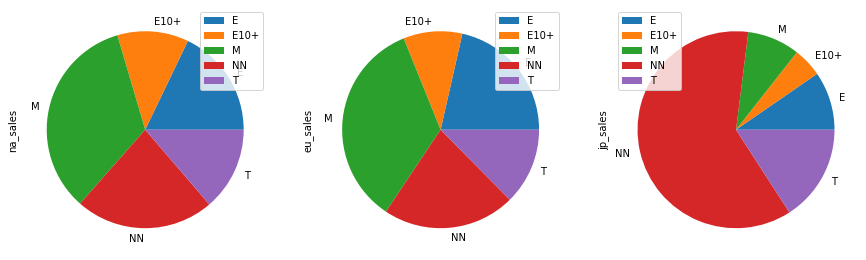

In [41]:
# круговая диаграмма для каждого региона
df_actual.groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).plot(
    kind='pie', subplots=True, figsize=(15, 10));

Мы видим, что есть 4 основные категории игр: игры для всех, для взрослых, для подростков и для людей старше 10 лет. Это нам говорит о возрастных категориях, которые предпочитают играть в игры и соответственно покупают игры исходя из своих предпочтений, а не самого рейтинга. Кроме того есть огромное количество игр без рейтинга. На диаграмме видно, на сколько сильно различается распределение категорий игр в Японии по сравнению с Северной Америкой и Европой.

**Вывод**

Интересы пользователей Северной Америки и Европы почти полнростью совпадают, а вот в Японии топ-5 платформ и топ-5 жанров уже будут значительно отличаться.

## Проверка гипотез

Сформульруем первую нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC равны. Тогда альтернативная гипотеза звучит: средние пользовательские рейтинги платформ Xbox One и PC не равны. Для рассчетов будем использовать метод `st.ttest_ind()`. Для этого создадим два списка с рейтингом платформ Xbox One и PC, p-value (alpha) зададим 5%.

In [42]:
# создание списка с рейтингом платформы Xbox One
xbox_one = df_actual.query('platform=="XOne" and user_score!="nan"')['user_score'].tolist()
xbox_one

[7.9,
 5.4,
 6.4,
 6.2,
 4.1,
 5.5,
 7.5,
 4.4,
 7.2,
 6.4,
 5.5,
 3.1,
 6.1,
 6.2,
 8.2,
 5.4,
 6.9,
 7.9,
 6.3,
 7.5,
 5.8,
 6.4,
 6.6,
 8.2,
 7.3,
 8.0,
 8.0,
 6.2,
 6.9,
 9.2,
 6.1,
 7.8,
 8.4,
 5.9,
 5.1,
 5.2,
 7.7,
 7.4,
 5.6,
 6.2,
 6.9,
 7.0,
 6.4,
 7.7,
 7.3,
 7.633333333333333,
 7.4,
 7.8,
 7.3,
 5.666666666666667,
 6.7,
 5.9,
 5.1,
 4.6,
 8.5,
 5.1,
 5.7,
 8.0,
 5.7,
 6.8,
 5.1,
 7.5,
 6.9,
 7.8,
 8.1,
 6.0,
 6.4,
 6.3,
 7.8,
 7.1,
 6.0,
 6.9,
 3.2,
 8.6,
 5.7749999999999995,
 7.7,
 5.1,
 6.6,
 7.9,
 6.1,
 7.2,
 8.4,
 8.5,
 7.0,
 5.4,
 4.3,
 6.8,
 5.5,
 5.8,
 5.3,
 7.1,
 5.5,
 4.0,
 8.3,
 7.7,
 6.8,
 6.7,
 6.8,
 6.733333333333334,
 7.3,
 7.933333333333334,
 7.0,
 8.3,
 5.3,
 7.0,
 7.2,
 4.4,
 7.0,
 8.3,
 7.5,
 8.0,
 7.9,
 7.2,
 6.6,
 7.3,
 4.1,
 7.9,
 5.199999999999999,
 8.7,
 5.7,
 8.0,
 8.1,
 8.35,
 2.1,
 8.2,
 5.6,
 7.2,
 6.2,
 5.3,
 7.5,
 6.0,
 7.800000000000001,
 3.1,
 7.6,
 8.5,
 8.7,
 6.8,
 6.3,
 7.7749999999999995,
 5.8,
 7.7,
 6.9,
 8.4,
 5.2,
 4.9,
 7.1,
 7.1,
 6.

In [43]:
# создание списка с рейтингом платформы PC
pc = df_actual.query('platform=="PC" and user_score!="nan"')['user_score'].tolist()
pc

[3.9,
 5.4,
 7.9,
 5.7,
 5.9,
 9.3,
 8.0,
 6.7,
 6.2,
 3.0,
 6.8,
 8.3,
 5.9,
 6.0,
 8.2,
 4.7,
 5.8,
 4.5,
 7.6,
 5.5,
 8.0,
 6.9,
 7.5,
 6.2,
 4.2,
 5.9,
 5.9,
 7.3,
 7.3,
 7.1,
 6.9,
 7.3,
 5.9,
 4.4,
 7.9,
 3.2,
 8.6,
 4.3,
 7.1,
 4.8,
 6.4,
 7.4,
 8.4,
 5.3,
 8.9,
 3.8,
 3.0,
 7.3,
 2.5,
 7.1,
 7.9,
 6.0,
 7.0,
 4.2,
 7.3,
 5.7,
 5.7,
 4.8,
 4.3,
 7.6,
 5.7,
 6.9,
 8.0,
 7.5,
 7.7,
 8.6,
 4.4,
 5.8,
 6.8,
 6.8,
 2.9,
 8.2,
 6.9,
 7.4,
 3.6,
 5.1,
 5.4,
 7.5,
 6.566666666666667,
 8.6,
 4.3,
 8.0,
 7.6,
 7.1,
 4.0,
 7.7,
 7.0,
 3.5,
 4.8,
 6.1,
 6.3,
 8.7,
 6.8,
 7.6,
 6.9,
 4.8,
 6.1,
 6.2,
 7.7,
 7.8,
 1.4,
 3.7,
 2.4,
 8.5,
 5.4,
 7.4,
 8.3,
 8.7,
 5.3,
 4.3,
 6.2,
 6.3,
 7.7,
 6.8,
 7.3,
 7.1,
 7.1,
 7.1,
 8.3,
 6.8,
 7.9,
 1.4,
 7.6]

In [44]:
# проверка нулевой гипотезы
alpha = .05 

results = st.ttest_ind(
    xbox_one, 
    pc)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.032480809044416796
Отвергаем нулевую гипотезу


Нулевая гипотиза отвергается, а это значит, что средние пользовательские рейтинги платформ Xbox One и PC не равны.

Тоже самое проведелаем с нулевой гипотизой "cредние пользовательские рейтинги жанров Action и Sports одинаковые". При этом альтернативная гипотиза - cредние пользовательские рейтинги жанров Action и Sports разные.

In [45]:
# создание списка с рейтингом игр жанра Action
action = df_actual.query('genre=="Action" and user_score!="nan"')['user_score'].tolist()
action

[8.3,
 7.9,
 9.1,
 8.1,
 6.3,
 4.9,
 7.6,
 4.1,
 8.2,
 6.8,
 8.1,
 7.9,
 8.6,
 9.0,
 6.3,
 7.9,
 6.5,
 5.1,
 7.3,
 5.1,
 4.5,
 5.8,
 6.6,
 8.5,
 8.0,
 6.1,
 7.8,
 7.5,
 7.2,
 6.2,
 5.0,
 8.3,
 7.9,
 7.8,
 7.6,
 8.4,
 7.3,
 5.7749999999999995,
 8.7,
 7.1,
 6.8,
 7.0,
 7.0,
 5.7749999999999995,
 6.8,
 6.4,
 7.1,
 7.4,
 7.6,
 8.2,
 7.3,
 6.7,
 7.0,
 7.1,
 7.8,
 7.1,
 7.5,
 5.4,
 7.3,
 7.1,
 7.0,
 8.4,
 6.7,
 8.7,
 7.7,
 7.2,
 7.7,
 7.2,
 4.6,
 8.5,
 6.6,
 5.9,
 6.8,
 3.4,
 7.7,
 6.4,
 3.0,
 6.5,
 6.9,
 6.1,
 8.1,
 3.7,
 4.6,
 5.6,
 5.9,
 7.4,
 7.6,
 7.0,
 8.7,
 6.4,
 7.0,
 4.7,
 5.6,
 7.933333333333334,
 8.3,
 7.1,
 8.0,
 5.4,
 6.9,
 6.733333333333334,
 7.9,
 4.2,
 5.7749999999999995,
 7.7,
 8.0,
 5.1,
 7.9,
 6.9,
 5.7,
 3.6,
 8.4,
 3.3,
 5.199999999999999,
 7.3,
 7.7,
 6.8,
 7.0,
 5.6,
 5.7,
 6.8,
 6.3,
 5.4,
 7.1,
 3.4,
 7.3,
 5.9,
 4.3,
 6.8,
 5.5,
 7.6,
 8.5,
 8.0,
 3.7,
 6.5,
 5.5,
 8.1,
 6.566666666666667,
 6.8,
 7.5,
 8.6,
 7.6,
 7.8,
 7.7749999999999995,
 8.4,
 6.8,
 6.8,
 5.9,
 8

In [46]:
# создание списка с рейтингом игр жанра Sports
sports = df_actual.query('genre=="Sports" and user_score!="nan"')['user_score'].tolist()
sports

[4.3,
 5.0,
 5.7,
 4.5,
 6.7,
 4.4,
 5.9,
 4.2,
 3.2,
 5.5,
 7.0,
 6.1,
 6.2,
 6.1,
 5.4,
 5.5,
 6.7,
 4.9,
 6.3,
 3.0,
 2.9,
 6.4,
 2.7,
 3.5,
 5.9,
 7.4,
 5.1,
 6.1,
 6.2,
 5.1,
 3.2,
 6.2,
 7.8,
 7.1,
 3.1,
 3.1,
 7.2,
 4.6,
 3.3,
 7.7,
 4.0,
 5.5,
 4.3,
 5.1,
 6.9,
 3.6,
 3.1,
 5.7,
 7.8,
 5.7,
 4.3,
 6.0,
 8.2,
 6.0,
 6.3,
 2.4,
 2.8,
 7.6,
 5.3,
 6.8,
 5.4,
 4.4,
 6.0,
 3.2,
 7.2,
 8.2,
 1.7,
 7.0,
 8.7,
 1.6,
 5.8,
 6.6,
 4.2,
 5.5,
 4.0,
 8.3,
 5.6,
 6.8,
 1.5,
 4.4,
 6.1,
 0.7,
 3.8,
 7.3,
 4.1,
 6.8,
 7.2,
 2.0,
 7.4,
 2.1,
 3.4,
 4.2,
 0.2,
 3.4,
 5.6,
 6.2,
 7.0,
 5.5,
 5.7,
 7.0,
 3.25,
 3.1,
 6.3,
 4.8,
 6.6,
 2.8,
 5.8,
 3.1,
 4.1,
 1.9,
 3.9,
 3.0,
 8.2,
 7.8,
 6.1,
 4.3,
 6.8,
 7.15,
 6.5,
 4.8,
 5.1,
 3.25,
 8.0,
 5.4,
 3.25,
 3.0,
 6.699999999999999,
 4.1,
 6.699999999999999,
 4.5,
 4.3,
 3.7,
 6.0,
 3.9,
 7.1,
 6.3,
 8.8,
 6.9,
 5.75,
 1.4,
 5.1,
 6.6]

In [47]:
# проверка нулевой гипотезы
alpha = .05 

results = st.ttest_ind(
    action, 
    sports)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.0402397283362026e-23
Отвергаем нулевую гипотезу


**Вывод**

Обе нулевые гипотезы были отвергнуты, а значит приняты альтернативные: средние пользовательские рейтинги платформ Xbox One и PC не равны и cредние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

Было проведено исследование данных о продажах игр, оценок пользователей и экспертов, жанров и платформ, в ходе которого была проведена предобработка данных. В данных количество значений в столбцах различается, а следовательно имеются пропуски. Говоря о причинах, скорее всего пропуски появились в результате некорректной выгрузки данных или же сбой при сборе информации. Заменять все пропуски мы не стали (заменили только часть), так как данные могут исказиться. Однако на это стоит обратить внимание и в дальнейшем не допускать появления такое числа пропусков.

Для прогнозирования и оценки реальной ситуции были оставлены данные за актуальные период, а именно 2014-2016 гг. В анализируемом периоде лидирует по продажам платформа PS4, так же можно выделить XOne и 3DS. Платформы PSP и Wii имеют самые маленькие продажи, т.е можно сказать, что устарели. Из рассмотренных жанров самым популярным, а следовательно самым прибыльным является жанр "Shooter", далее идут "Sports", "Platform" и "Role-Playing". А наименее прибыльными оказались игры жанра "Adventure", "Strategy" и "Puzzle".

Для того, чтобы понимать, на какой продукт делать ставки, необходимо опираться на то, из какого региона пользователи. Если предпочтения между Северной Америкой и Европой не такие сильные, то в Японии интересы уже другие. Например, самая популярная платформа в Америке - это PS4 (34.7%) и XOne (28.6%), в Европе - PS4 (48%) и XOne (17%), а в Японии - 3DS (47.5%) и PS4 (15%). При этом популярными жанрами для Северной Америки являются Shooter, Action, Sports, Role-Playing и Misc. Для Европы жанры совпадают за исключением гонок: Action, Shooter, Sports, Racing и Misc. А для Японии самым популярным жанром является Role-Playing и далее идут Action, Fighting, Misc, и Shooter.

Было выдвенуто и проверено две нулевые гипотезы. Первая нулевая гипотеза была отвергнута, следовательно принята альтернативная ей гипотеза - "средние пользовательские рейтинги платформ Xbox One и PC не равны". Вторая же гипотеза аналогично  была отвергнута, то есть cредние пользовательские рейтинги жанров Action и Sports разные.